# Project

[Child Mind Institute Data](https://www.kaggle.com/competitions/child-mind-institute-problematic-internet-use/data)

How can we relate acitivty data with PCIAT scores? Collecting survey data is time consuming, and if similar insights can be gained through automatically collected data, that's better.

**Background research:**
- Internet use and Problematic Internet Use: a systematic review of longitudinal research trends in adolescence and emergent adulthood
    - DOI: 10.1080/02673843.2016.1227716
- Ambulatory assessment:
    - DOI: 10.1146/annurev-clinpsy-050212-185510

**Potential Models:**
- Imputation
- Multilevel modeling
    - [A brief introduction to multilevel modeling](https://www.analyticsvidhya.com/blog/2022/01/a-brief-introduction-to-multilevel-modelling/)
 
- Neural Network
    - Compare results
    - Explore methods to increase interpretability if performance is better than multilevel modeling

**Challenges:**
- Missing data
- Potentially noisy and subjective data
- Imbalanced target
- Amount of predictors: multicollinearity and overfitting

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the datasets
data_dictionary = pd.read_csv('data/data_dictionary.csv')
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

# Initial Exploration
# 1. Data Overview
print("Data Dictionary:")
display(data_dictionary.head())

print("\nTrain Data Information:")
display(train_data.info())

print("\nTrain Data Description:")
display(train_data.describe())

print("\nTest Data Information:")
display(test_data.info())

print("\nTest Data Description:")
display(test_data.describe())

Data Dictionary:


,Instrument,Field,Description,Type,Values,Value Labels
0,Identifier,id,Participant's ID,str,NaN,NaN
1,Demographics,Basic_Demos-Enroll_Season,Season of enrollment,str,"Spring, Summer, Fall, Winter",NaN
2,Demographics,Basic_Demos-Age,Age of participant,float,NaN,NaN
3,Demographics,Basic_Demos-Sex,Sex of participant,categorical int,"0,1","0=Male, 1=Female"
4,Children's Global Assessment Scale,CGAS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN



Train Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference       

None


Train Data Description:


,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
count,3960.000000,3960.000000,2421.000000,3022.000000,3027.000000,3076.000000,898.000000,2954.000000,2967.000000,2954.000000,...,2728.000000,2725.000000,2728.000000,2730.000000,2733.000000,2736.000000,2609.000000,2606.000000,3301.000000,2736.000000
mean,10.433586,0.372727,65.454771,19.331929,55.946713,89.038615,27.278508,69.648951,81.597236,116.983074,...,1.452346,1.627890,1.613636,1.158974,0.943652,27.896199,41.088923,57.763622,1.060588,0.580409
std,3.574648,0.483591,22.341862,5.113934,7.473764,44.569040,5.567287,13.611226,13.665196,17.061225,...,1.495600,1.445622,1.529178,1.343661,1.185460,20.338853,10.427433,13.196091,1.094875,0.771122
min,5.000000,0.000000,25.000000,0.000000,33.000000,0.000000,18.000000,0.000000,27.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,38.000000,0.000000,0.000000
25%,8.000000,0.000000,59.000000,15.869350,50.000000,57.200000,23.000000,61.000000,72.000000,107.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,33.000000,47.000000,0.000000,0.000000
50%,10.000000,0.000000,65.000000,17.937682,55.000000,77.000000,26.000000,68.000000,81.000000,114.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,26.000000,39.000000,55.000000,1.000000,0.000000
75%,13.000000,1.000000,75.000000,21.571244,62.000000,113.800000,30.000000,76.000000,90.500000,125.000000,...,2.000000,3.000000,2.000000,2.000000,1.000000,41.000000,46.000000,64.000000,2.000000,1.000000
max,22.000000,1.000000,999.000000,59.132048,78.500000,315.000000,50.000000,179.000000,138.000000,203.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,93.000000,96.000000,100.000000,3.000000,3.000000



Test Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 59 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      20 non-null     object 
 1   Basic_Demos-Enroll_Season               20 non-null     object 
 2   Basic_Demos-Age                         20 non-null     int64  
 3   Basic_Demos-Sex                         20 non-null     int64  
 4   CGAS-Season                             10 non-null     object 
 5   CGAS-CGAS_Score                         8 non-null      float64
 6   Physical-Season                         14 non-null     object 
 7   Physical-BMI                            13 non-null     float64
 8   Physical-Height                         13 non-null     float64
 9   Physical-Weight                         13 non-null     float64
 10  Physical-Waist_Circumference            

None


Test Data Description:


,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-PAQ_A_Total,PAQ_C-PAQ_C_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday
count,20.000000,20.000000,8.000000,13.000000,13.000000,13.000000,5.000000,11.000000,12.000000,11.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,1.00,9.000000,10.000000,10.00000,16.000000
mean,10.750000,0.400000,62.500000,19.835939,52.961538,79.200000,25.400000,70.545455,81.666667,117.545455,...,28.486750,15.457795,56.989275,25.985962,45.167825,1.04,2.372333,36.800000,52.30000,1.437500
std,3.725799,0.502625,11.275764,4.927625,6.942357,23.632181,3.130495,18.806189,9.316001,21.262002,...,5.099449,4.021153,14.490362,7.479799,11.940000,NaN,1.080099,5.533735,7.02456,1.152895
min,5.000000,0.000000,50.000000,14.035590,37.500000,46.000000,22.000000,57.000000,70.000000,95.000000,...,21.035200,8.895360,38.917700,15.410700,27.055200,1.04,1.100000,27.000000,40.00000,0.000000
25%,9.000000,0.000000,51.000000,16.861286,48.000000,60.200000,24.000000,60.500000,74.500000,102.500000,...,24.230725,13.815400,44.627250,19.801775,37.245575,1.04,1.270000,33.500000,47.75000,0.000000
50%,10.000000,0.000000,63.000000,18.292347,55.000000,81.600000,24.000000,63.000000,80.000000,116.000000,...,29.470400,16.402450,59.199050,26.337750,46.608850,1.04,2.340000,37.500000,53.50000,2.000000
75%,12.250000,1.000000,71.000000,21.079065,57.750000,85.600000,27.000000,73.000000,90.250000,119.500000,...,31.398725,17.674625,65.222050,30.421100,51.860475,1.04,3.020000,39.750000,55.75000,2.000000
max,19.000000,1.000000,80.000000,30.094649,60.000000,121.600000,30.000000,123.000000,97.000000,163.000000,...,36.057200,20.902000,79.698200,36.223200,63.126500,1.04,4.110000,46.000000,64.00000,3.000000


In [110]:
print(f'There are {train_data['id'].nunique()} unique participants in the train data.')
print(f'There are {test_data['id'].nunique()} unique participants in the test data.')

There are 3960 unique participants in the train data.
There are 20 unique participants in the test data.


## Missing Values


Missing Values in Train Data:
PreInt_EduHx-Season                        420
FGC-Season                                 614
Physical-Season                            650
PreInt_EduHx-computerinternet_hoursday     659
Physical-Weight                            884
                                          ... 
Fitness_Endurance-Max_Stage               3217
Fitness_Endurance-Time_Sec                3220
Fitness_Endurance-Time_Mins               3220
PAQ_A-Season                              3485
PAQ_A-PAQ_A_Total                         3485
Length: 78, dtype: int64


Text(0.5, 0, 'Number of Missing Values per Variable')

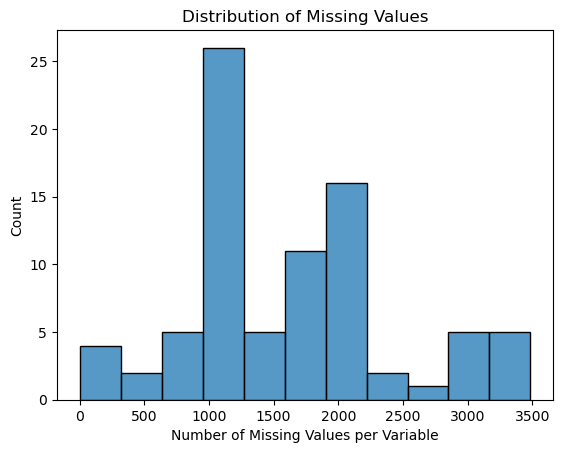

In [5]:
# 2. Checking Missing Values
print("\nMissing Values in Train Data:")
missing_values = train_data.isnull().sum()
print(missing_values[missing_values > 0].sort_values())
sns.histplot(missing_values)
plt.title('Distribution of Missing Values')
plt.xlabel('Number of Missing Values per Variable')

## Target Variable

/var/folders/18/y5p3lwcd31j2dw1d0_k3lqsh0000gp/T/ipykernel_23046/2058094458.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='sii', palette='viridis')


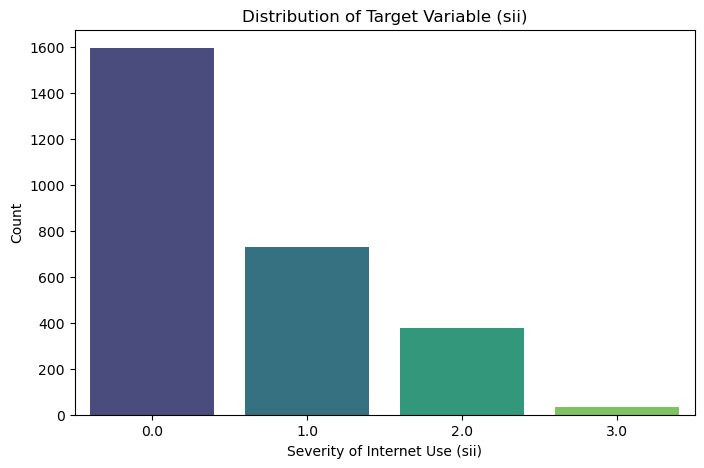

In [6]:
# 3. Target Variable Analysis
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='sii', palette='viridis')
plt.xlabel('Severity of Internet Use (sii)')
plt.ylabel('Count')
plt.title('Distribution of Target Variable (sii)')
plt.show()

# Univariate Predictor Exploration
Below we plot all the responses for each of the instruments used to assess participants. There are a lot of measures within and between instruments that are redundant, so we should definitely look into which features to use. Also, when one measurement is missing, a comparable measure from a different instrument may be present. For example, there are separate physical activity questionnaires for adolescents nad children, leading to high missingness.

In [7]:
print('These are all the instruments.')
data_dictionary['Instrument'].unique()

These are all the instruments.


array(['Identifier', 'Demographics', "Children's Global Assessment Scale",
       'Physical Measures', 'FitnessGram Vitals and Treadmill',
       'FitnessGram Child', 'Bio-electric Impedance Analysis',
       'Physical Activity Questionnaire (Adolescents)',
       'Physical Activity Questionnaire (Children)',
       'Parent-Child Internet Addiction Test', 'Sleep Disturbance Scale',
       'Internet Use'], dtype=object)

In [56]:
# plotting function!
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.style as style
import textwrap

# Set the style for the plots
style.use('fivethirtyeight')

def plot_columns(cols, data_dictionary, train_data, suptitle, num_cols=3):
    """
    This function plots barplots or histograms for the given columns based on their types.
    All the plots are places in one figure.

    Parameters:
    - cols: List of column names to plot.
    - data_dictionary: DataFrame containing descriptions and types of the columns.
    - train_data: DataFrame with the data to be visualized.
    - num_cols: Number of columns per row in the plot (default is 2).
    """
    
    # Determine the number of rows required based on the number of columns to plot
    num_rows = math.ceil(len(cols) / num_cols)

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 6, num_rows * 5))
    axes = axes.flatten()

    # Loop over columns and plot the corresponding chart
    for i, col in enumerate(cols):
        ax = axes[i]
        description = data_dictionary.loc[data_dictionary['Field'] == col, 'Description'].values
        title_text = f'{col}: {description[0] if len(description) > 0 else "No description available"}'
        
        # Wrap title text to prevent long titles from overflowing
        wrapped_title = "\n".join(textwrap.wrap(title_text, width=40))
        col_type = data_dictionary.loc[data_dictionary['Field'] == col, 'Type'].values[0]
        
        # Plot based on the column type
        if col_type == 'str' or col_type == 'categorical int':
            sns.barplot(
                x=train_data[col].value_counts().index,
                y=train_data[col].value_counts(),
                color='#5F9EA0',
                ax=ax
            )
        elif col_type == 'int' or col_type == 'float':
            sns.histplot(
                x=train_data[col],
                color='#5F9EA0',
                ax=ax
            )    
        ax.set_title(wrapped_title, fontsize=12)
        ax.set_xlabel('Response', fontsize=10)
        ax.set_ylabel('Count', fontsize=10)
        ax.tick_params(axis='x', rotation=30)

    # Remove unused subplots if there are any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Add a main title for the entire figure
    fig.suptitle(suptitle, fontsize=16, weight='bold', y=1)

    # Adjust layout and spacing
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.5, hspace=0.6)

    # Show the plot
    plt.show()

## Demographics

In [66]:
# These are the related columns and descriptions
display(data_dictionary.loc[data_dictionary['Instrument'] == 'Demographics', ['Field', 'Description']])
cols = data_dictionary.loc[data_dictionary['Instrument'] == 'Demographics', 'Field']

,Field,Description
1,Basic_Demos-Enroll_Season,Season of enrollment
2,Basic_Demos-Age,Age of participant
3,Basic_Demos-Sex,Sex of participant


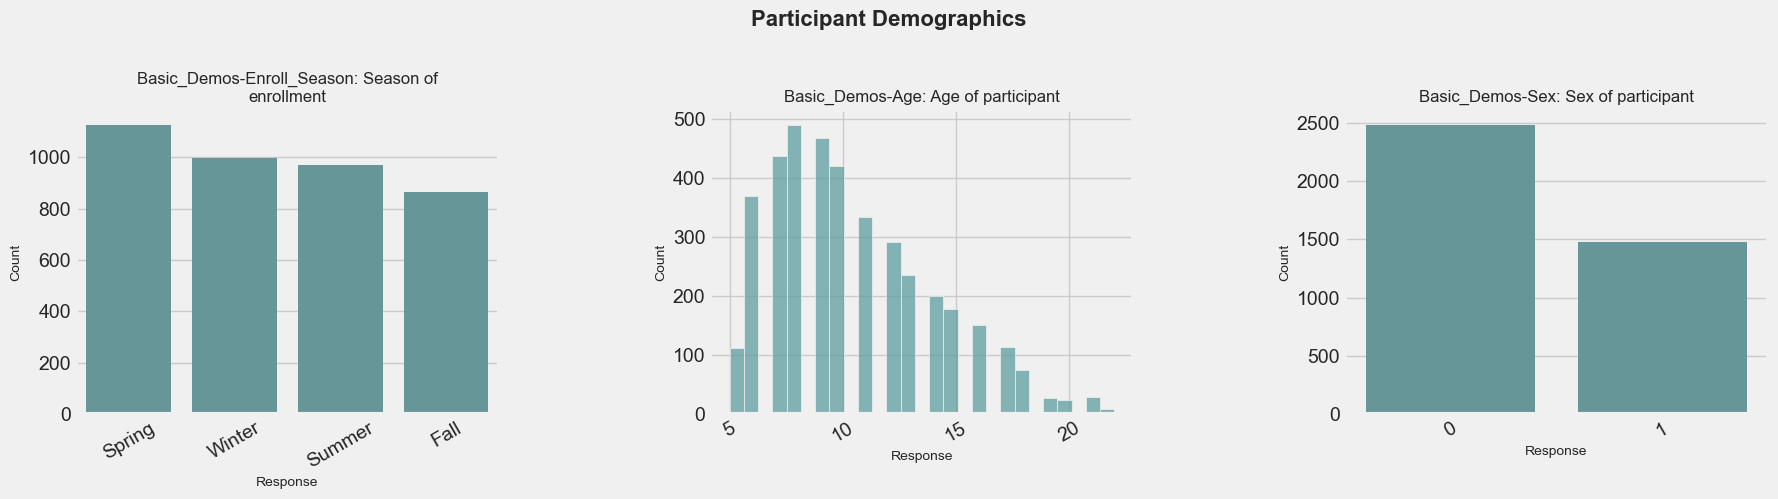

In [67]:
plot_columns(cols, data_dictionary, train_data, suptitle = 'Participant Demographics', num_cols=3)

## Children's Global Assessment Scale

In [76]:
# These are the related columns and descriptions
display(data_dictionary.loc[data_dictionary['Instrument'] == "Children's Global Assessment Scale", ['Field', 'Description']])
cols = data_dictionary.loc[data_dictionary['Instrument'] == "Children's Global Assessment Scale", 'Field']

,Field,Description
4,CGAS-Season,Season of participation
5,CGAS-CGAS_Score,Children's Global Assessment Scale Score


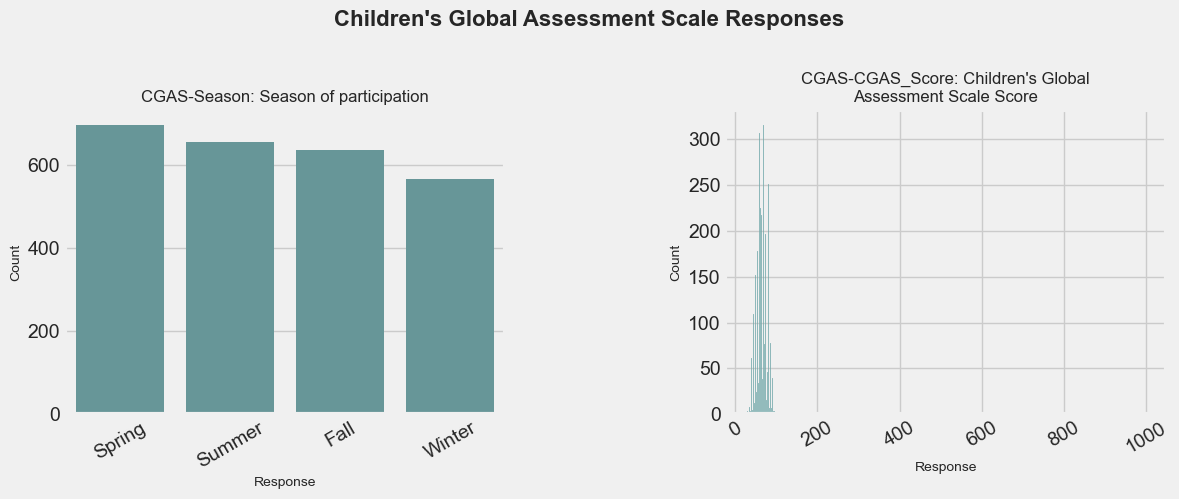

In [77]:
plot_columns(cols, data_dictionary, train_data, suptitle = "Children's Global Assessment Scale Responses", num_cols=2)

In [84]:
train_data['CGAS-CGAS_Score'].sort_values(ascending=False)

2065    999.0
2926     95.0
3713     95.0
667      95.0
1007     95.0
        ...  
3951      NaN
3953      NaN
3954      NaN
3956      NaN
3959      NaN
Name: CGAS-CGAS_Score, Length: 3960, dtype: float64

The maximum value is 99, so it looks like we should fix one value. Should check for test data as well

## Physical Measures

In [72]:
# These are the related columns and descriptions
display(data_dictionary.loc[data_dictionary['Instrument'] == 'Physical Measures', ['Field', 'Description']])
cols = data_dictionary.loc[data_dictionary['Instrument'] == 'Physical Measures', 'Field']

,Field,Description
6,Physical-Season,Season of participation
7,Physical-BMI,Body Mass Index (kg/m^2)
8,Physical-Height,Height (in)
9,Physical-Weight,Weight (lbs)
10,Physical-Waist_Circumference,Waist circumference (in)
11,Physical-Diastolic_BP,Diastolic BP (mmHg)
12,Physical-HeartRate,Heart rate (beats/min)
13,Physical-Systolic_BP,Systolic BP (mmHg)


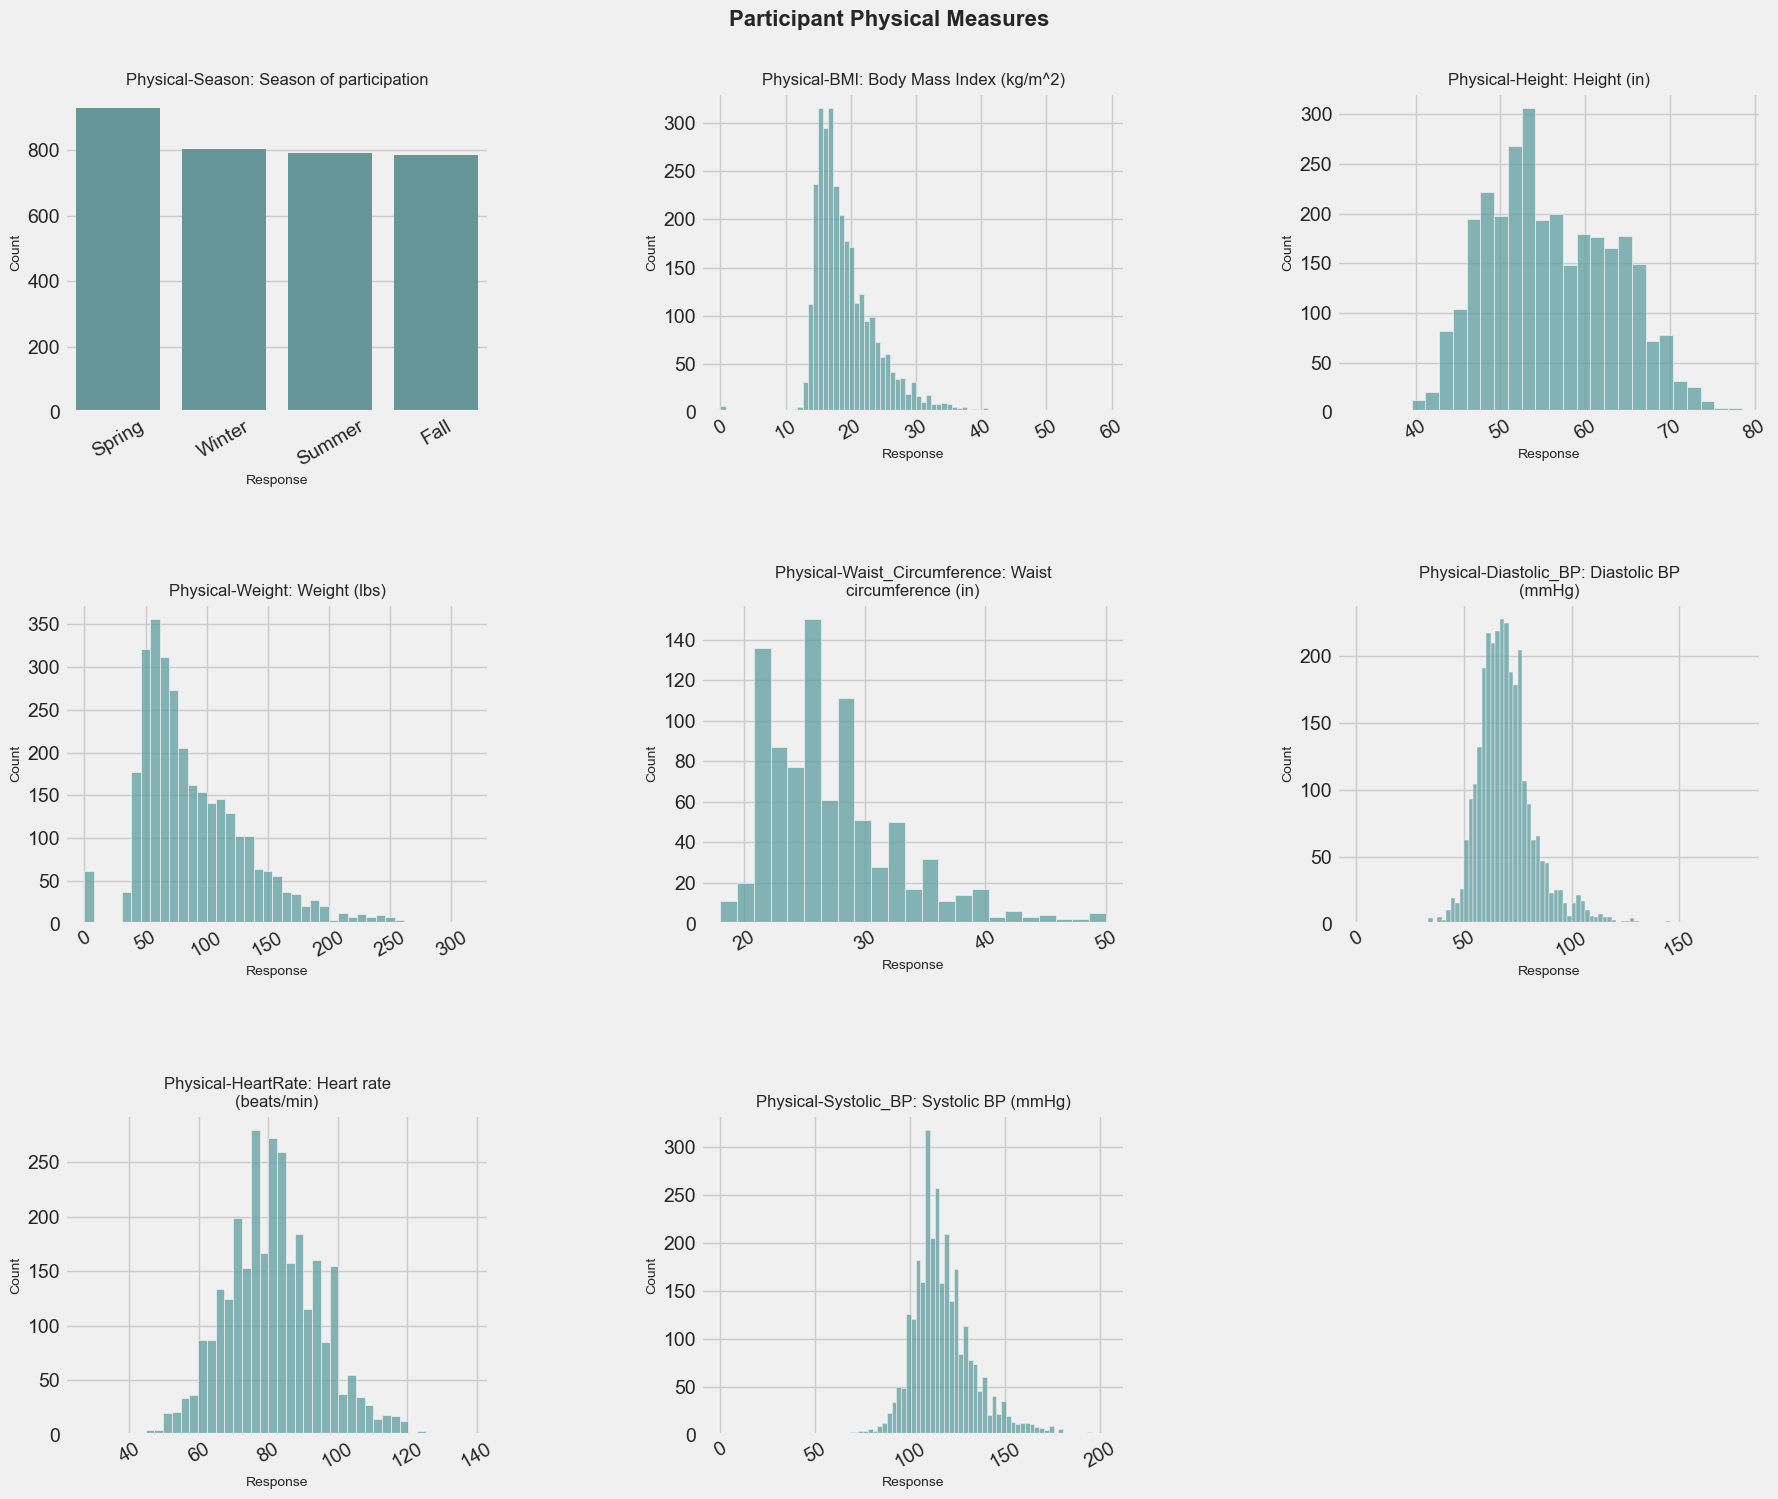

In [75]:
plot_columns(cols, data_dictionary, train_data, suptitle = 'Participant Physical Measures', num_cols=3)

## FitnessGram Vitals and Treadmill

In [92]:
# These are the related columns and descriptions
display(data_dictionary.loc[data_dictionary['Instrument'] == 'FitnessGram Vitals and Treadmill', ['Field', 'Description']])
cols = data_dictionary.loc[data_dictionary['Instrument'] == 'FitnessGram Vitals and Treadmill', 'Field']

,Field,Description
14,Fitness_Endurance-Season,Season of participation
15,Fitness_Endurance-Max_Stage,Maximum stage reached
16,Fitness_Endurance-Time_Mins,Exact time completed: Minutes
17,Fitness_Endurance-Time_Sec,Exact time completed: Seconds


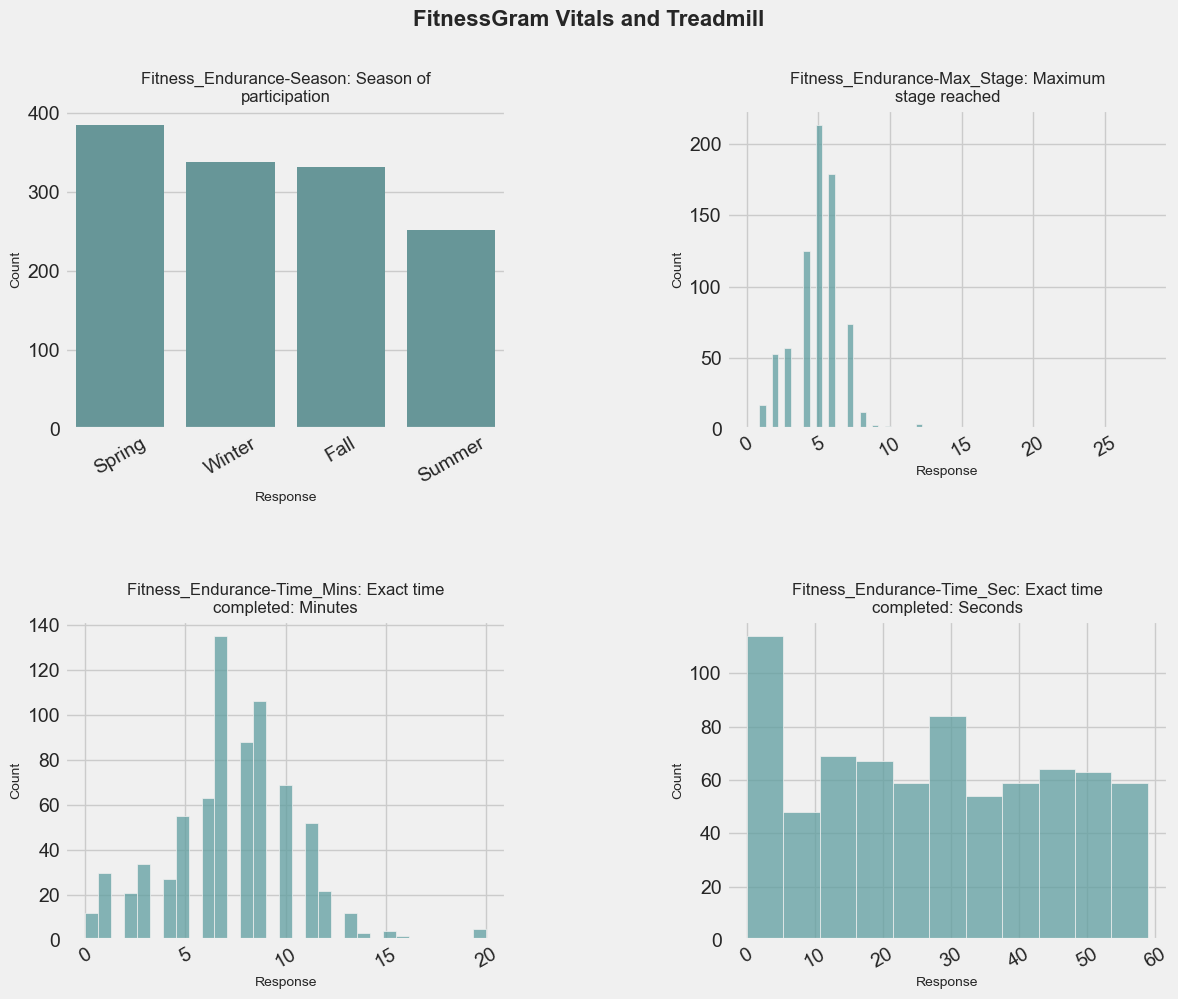

In [93]:
plot_columns(cols, data_dictionary, train_data, suptitle = 'FitnessGram Vitals and Treadmill', num_cols=2)

## FitnessGram Child

In [94]:
# These are the related columns and descriptions
display(data_dictionary.loc[data_dictionary['Instrument'] == 'FitnessGram Child', ['Field', 'Description']])
cols = data_dictionary.loc[data_dictionary['Instrument'] == 'FitnessGram Child', 'Field']

,Field,Description
18,FGC-Season,Season of participation
19,FGC-FGC_CU,Curl up total
20,FGC-FGC_CU_Zone,Curl up fitness zone
21,FGC-FGC_GSND,Grip Strength total (non-dominant)
22,FGC-FGC_GSND_Zone,Grip Strength fitness zone (non-dominant)
23,FGC-FGC_GSD,Grip Strength total (dominant)
24,FGC-FGC_GSD_Zone,Grip Strength fitness zone (dominant)
25,FGC-FGC_PU,Push-up total
26,FGC-FGC_PU_Zone,Push-up fitness zone
27,FGC-FGC_SRL,Sit & Reach total (left side)


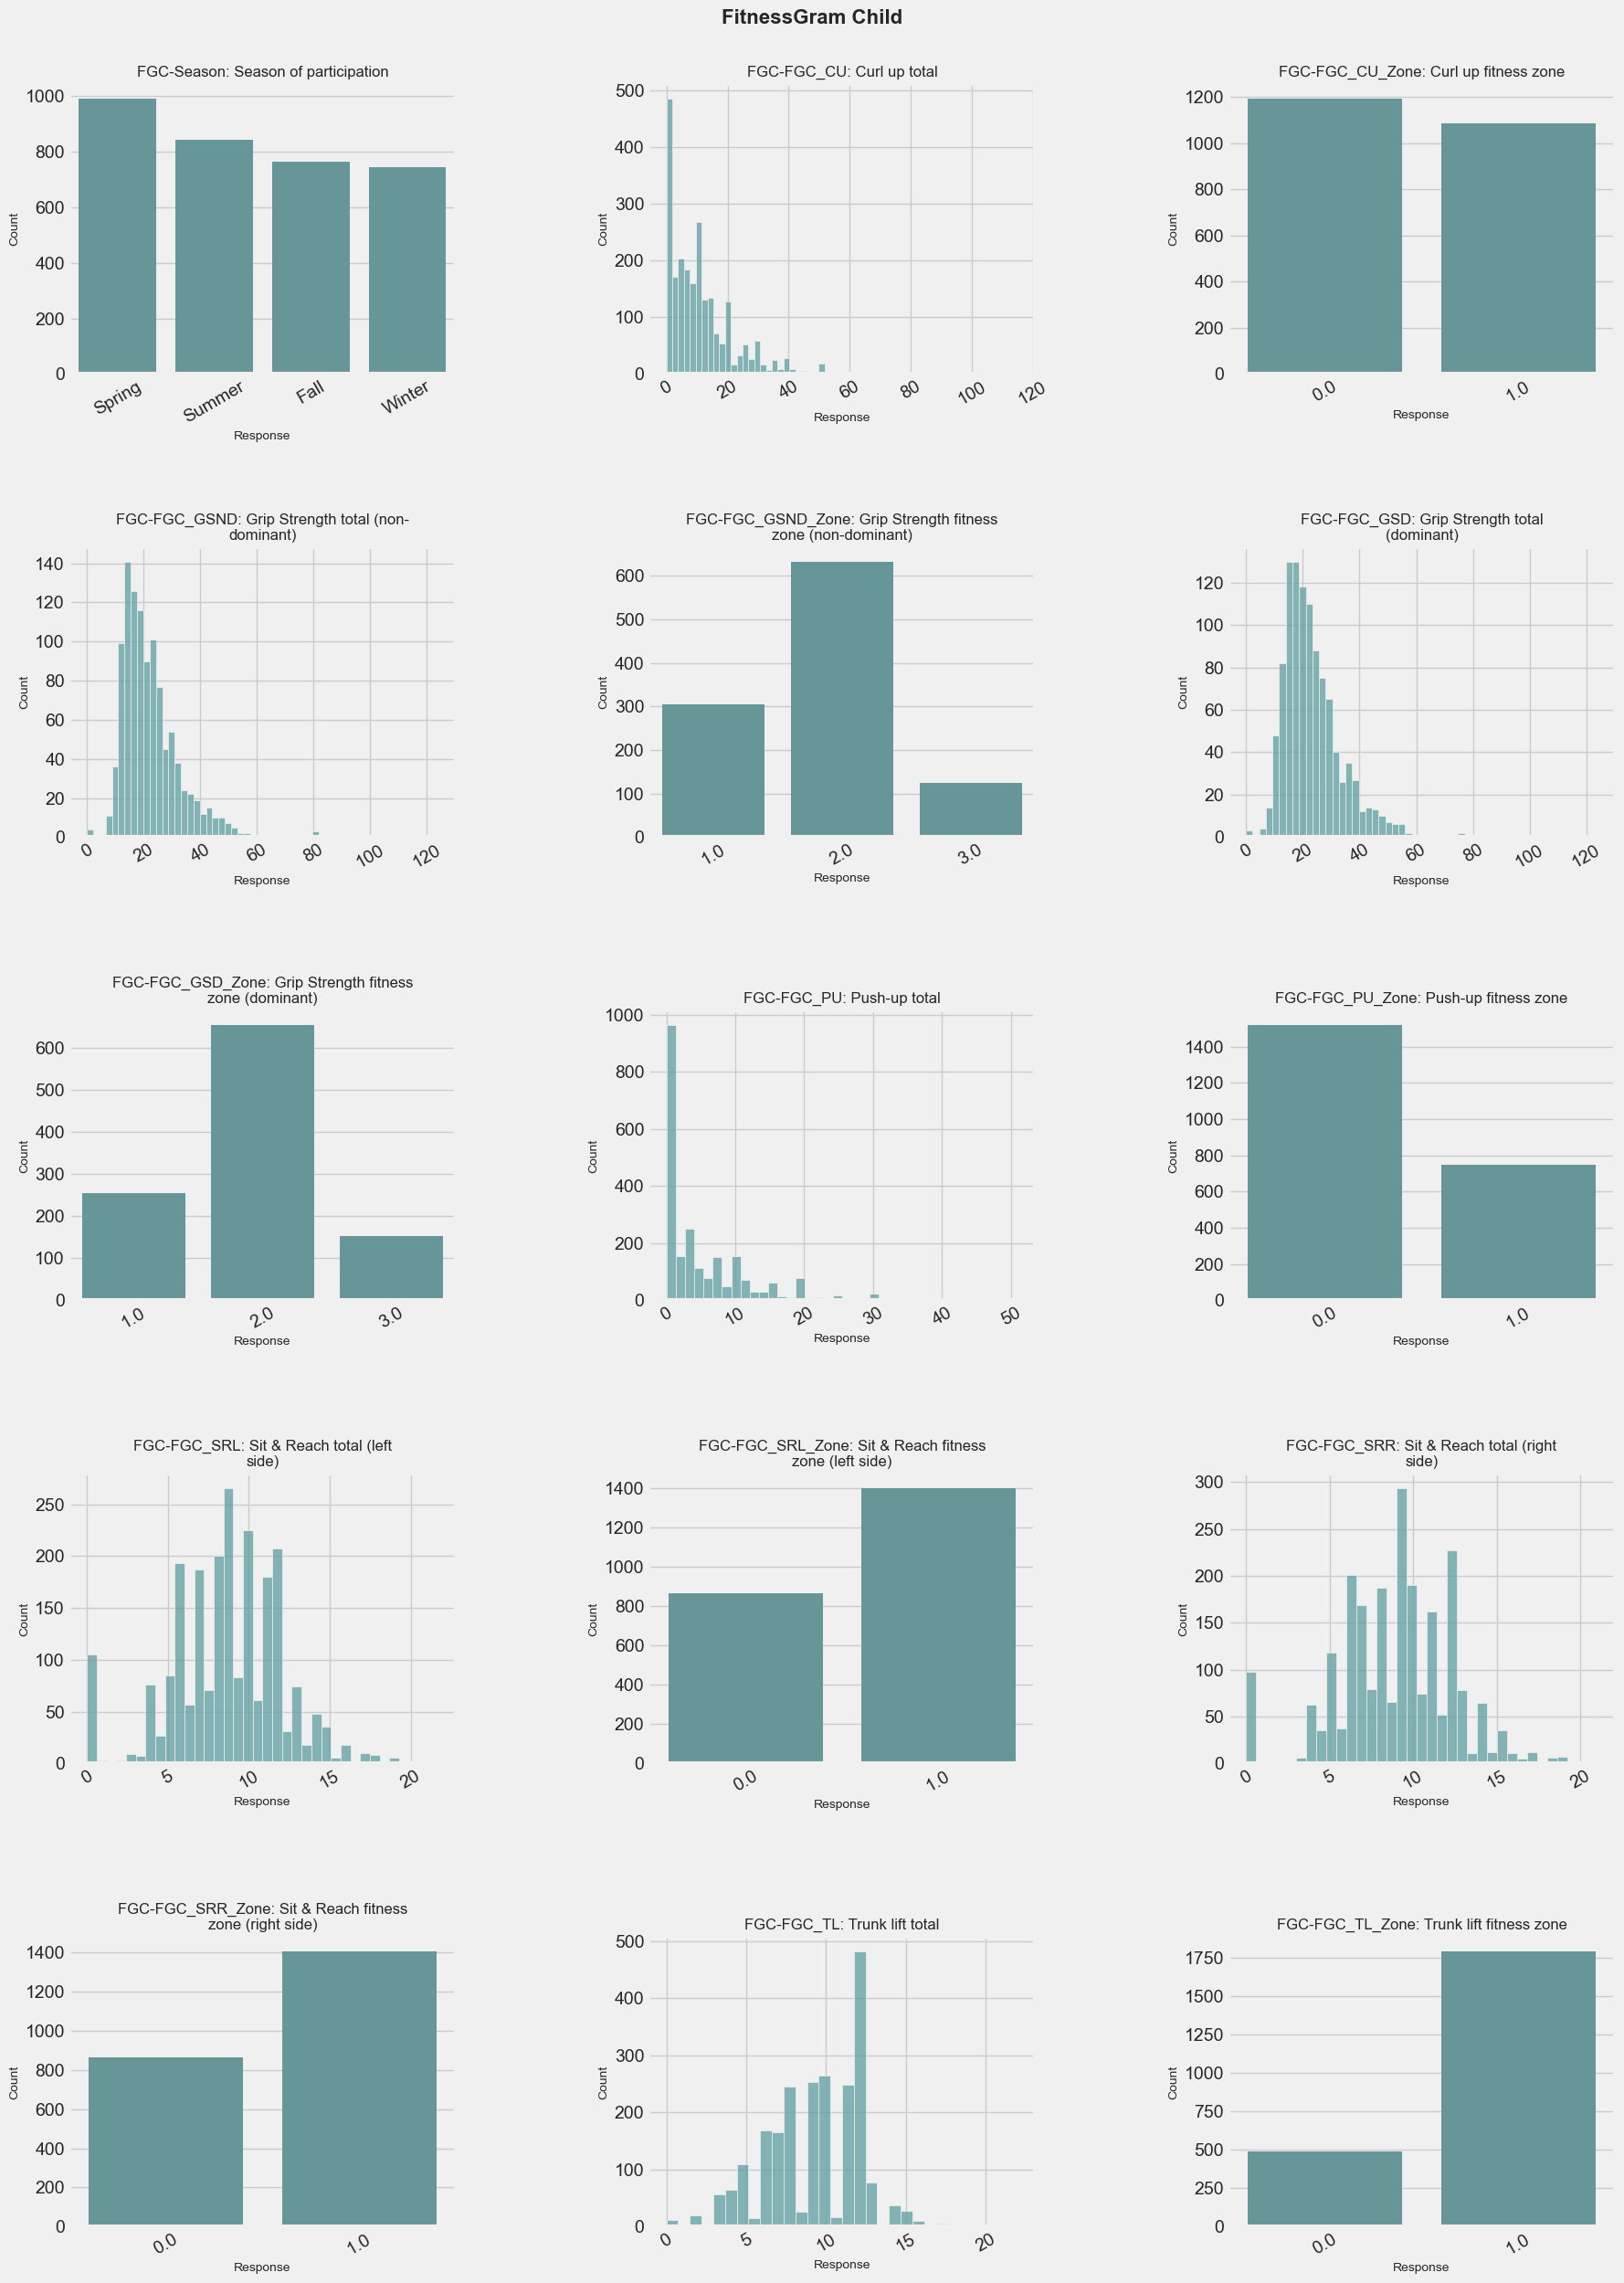

In [95]:
plot_columns(cols, data_dictionary, train_data, suptitle = 'FitnessGram Child', num_cols=3)

## Bio-electric Impedance Analysis

From Chat: Bioelectric Impedance Analysis (BIA) is a non-invasive method used to assess body composition, specifically the amount of fat, muscle, and water in the body, by measuring the resistance and reactance of body tissues to a small, harmless electrical current.

In [96]:
# These are the related columns and descriptions
display(data_dictionary.loc[data_dictionary['Instrument'] == 'Bio-electric Impedance Analysis', ['Field', 'Description']])
cols = data_dictionary.loc[data_dictionary['Instrument'] == 'Bio-electric Impedance Analysis', 'Field']

,Field,Description
33,BIA-Season,Season of participation
34,BIA-BIA_Activity_Level_num,Activity Level
35,BIA-BIA_BMC,Bone Mineral Content
36,BIA-BIA_BMI,Body Mass Index
37,BIA-BIA_BMR,Basal Metabolic Rate
38,BIA-BIA_DEE,Daily Energy Expenditure
39,BIA-BIA_ECW,Extracellular Water
40,BIA-BIA_FFM,Fat Free Mass
41,BIA-BIA_FFMI,Fat Free Mass Index
42,BIA-BIA_FMI,Fat Mass Index


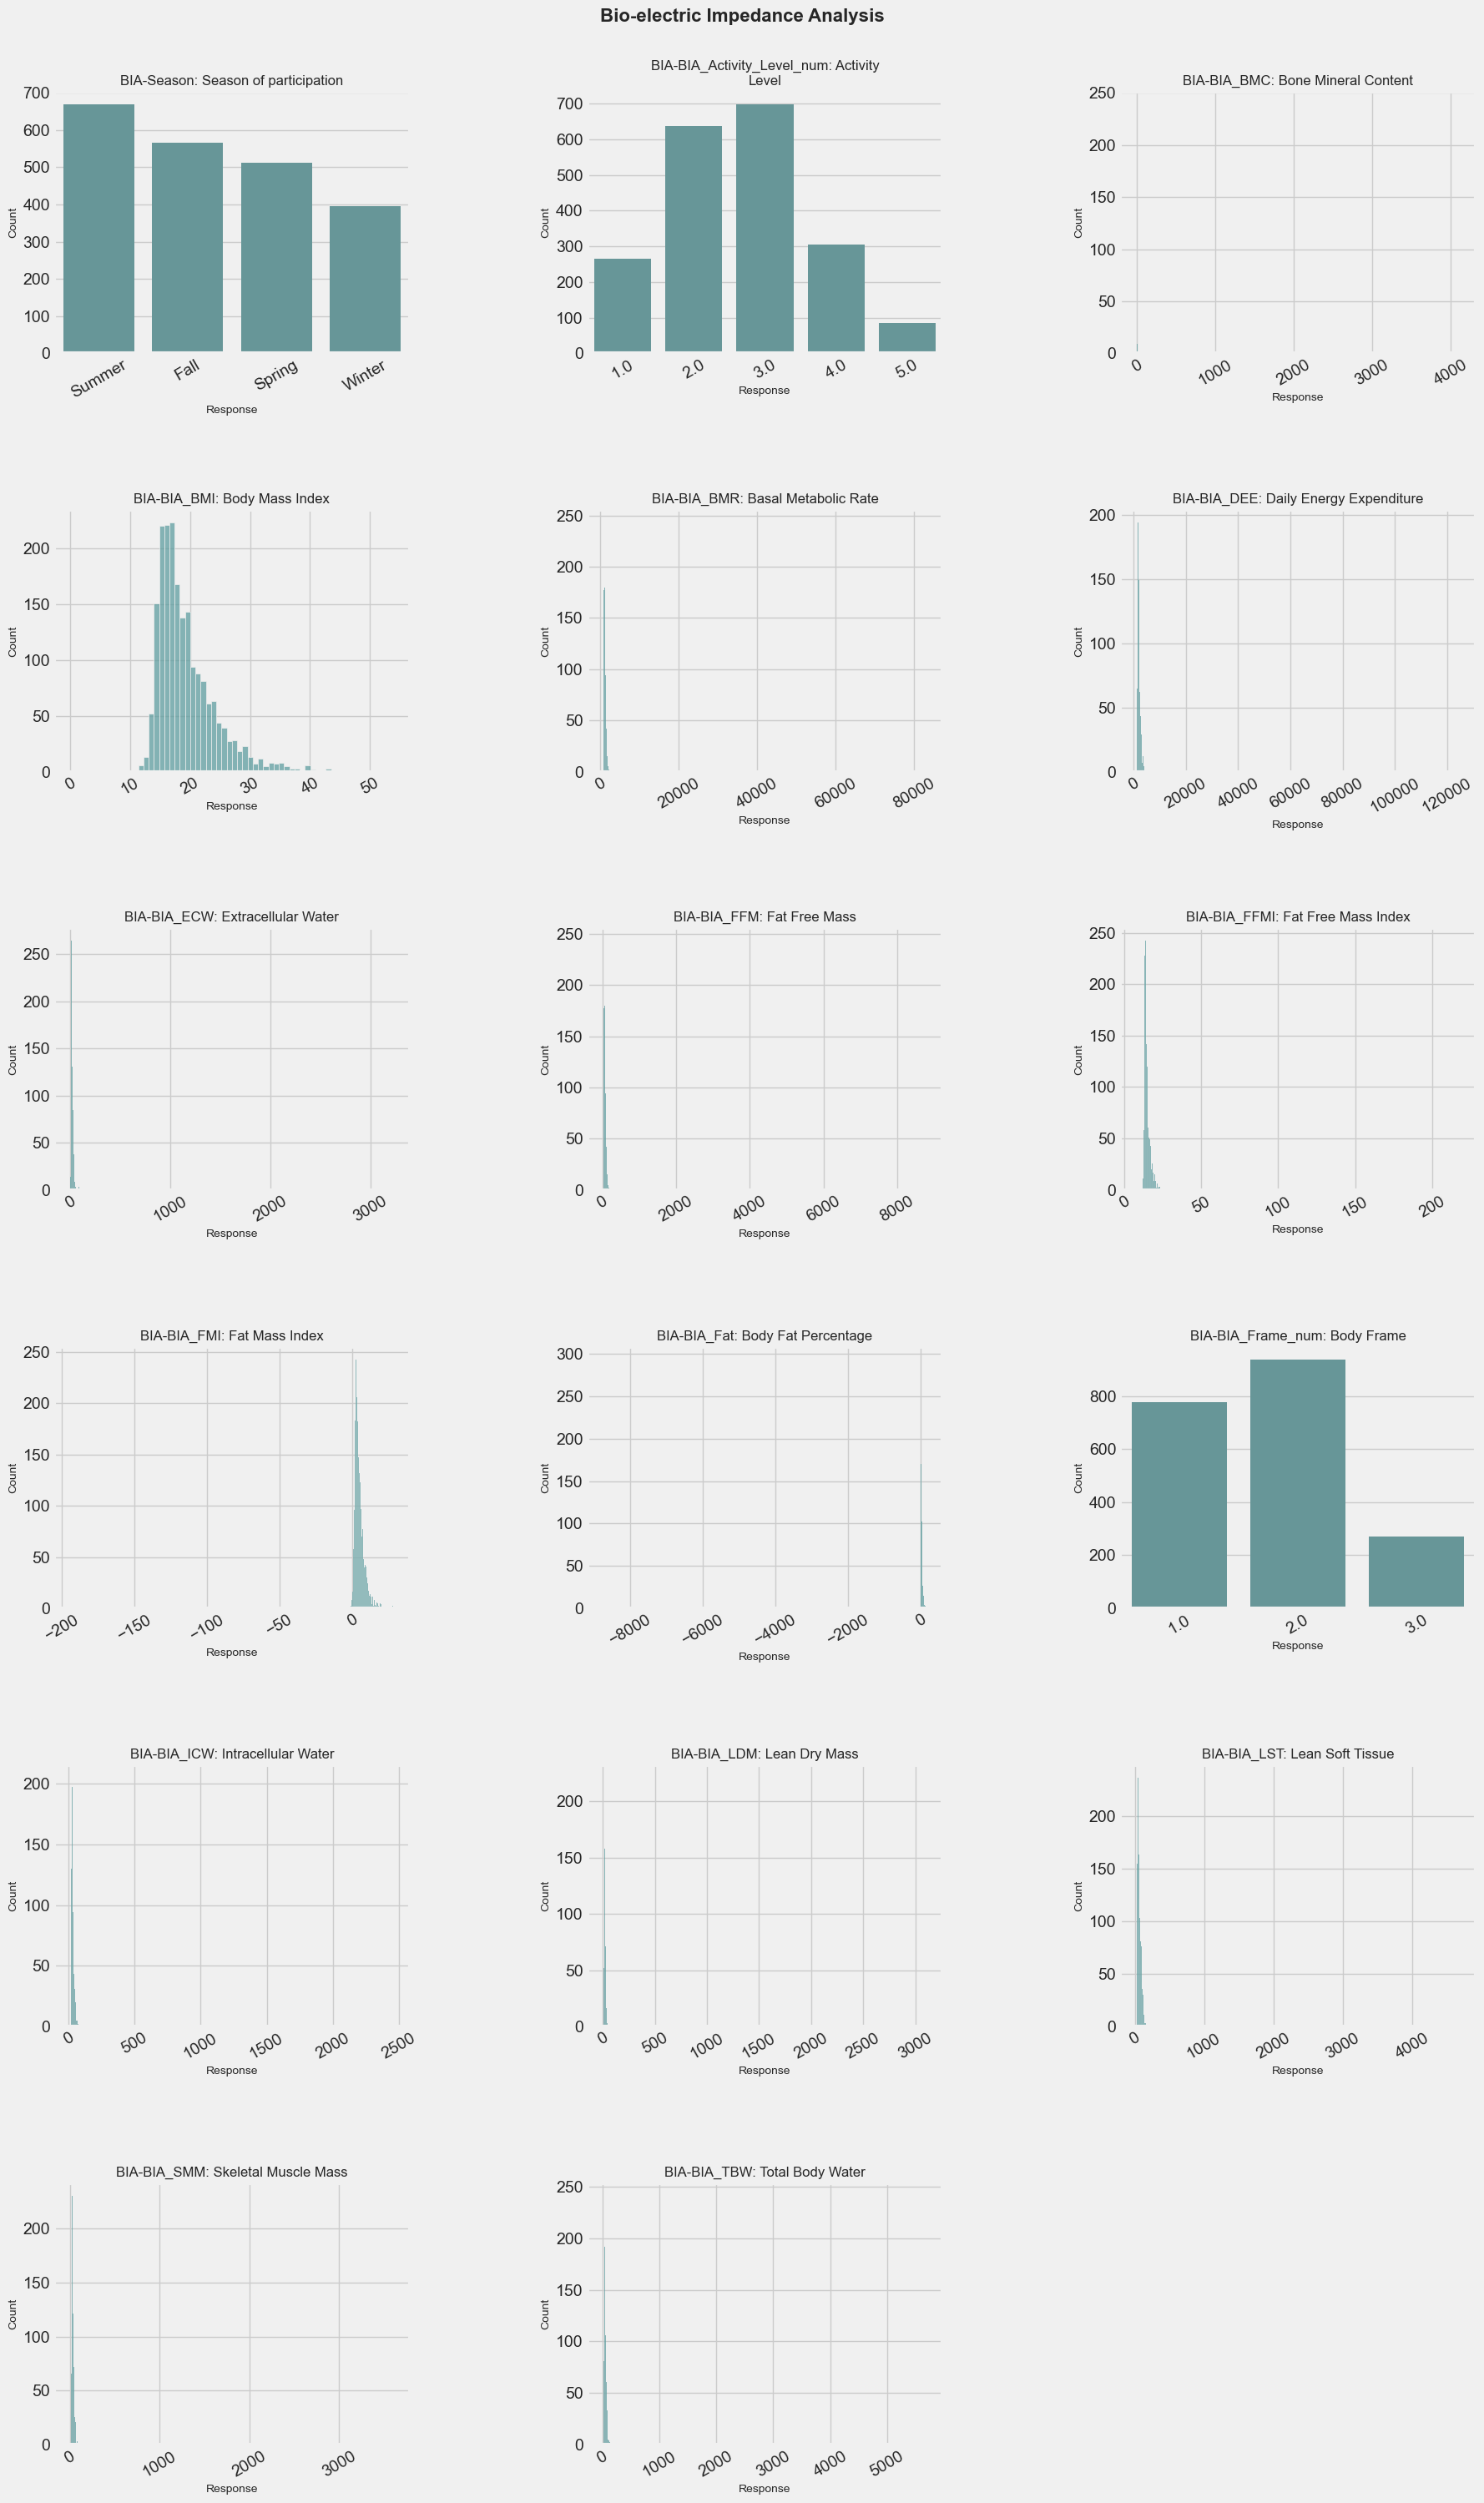

In [97]:
plot_columns(cols, data_dictionary, train_data, suptitle = 'Bio-electric Impedance Analysis', num_cols=3)

## Physical Activity Questionnaire (Adolescents)

In [98]:
# These are the related columns and descriptions
display(data_dictionary.loc[data_dictionary['Instrument'] == 'Physical Activity Questionnaire (Adolescents)', ['Field', 'Description']])
cols = data_dictionary.loc[data_dictionary['Instrument'] == 'Physical Activity Questionnaire (Adolescents)', 'Field']

,Field,Description
50,PAQ_A-Season,Season of participation
51,PAQ_A-PAQ_A_Total,Activity Summary Score (Adolescents)


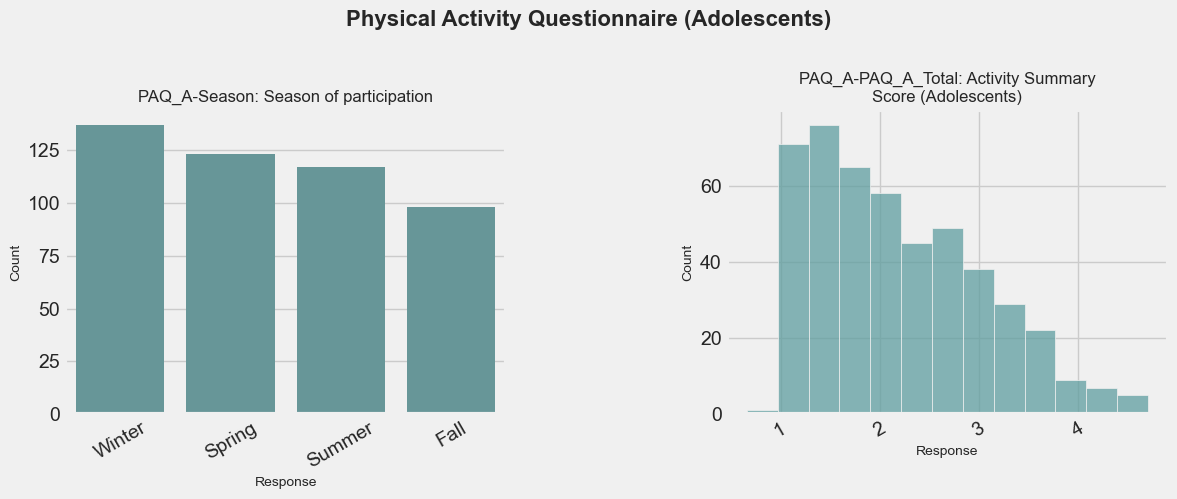

In [100]:
plot_columns(cols, data_dictionary, train_data, suptitle = 'Physical Activity Questionnaire (Adolescents)', num_cols=2)

## Physical Activity Questionnaire (Children)

In [101]:
# These are the related columns and descriptions
display(data_dictionary.loc[data_dictionary['Instrument'] == 'Physical Activity Questionnaire (Children)', ['Field', 'Description']])
cols = data_dictionary.loc[data_dictionary['Instrument'] == 'Physical Activity Questionnaire (Children)', 'Field']

,Field,Description
52,PAQ_C-Season,Season of participation
53,PAQ_C-PAQ_C_Total,Activity Summary Score (Children)


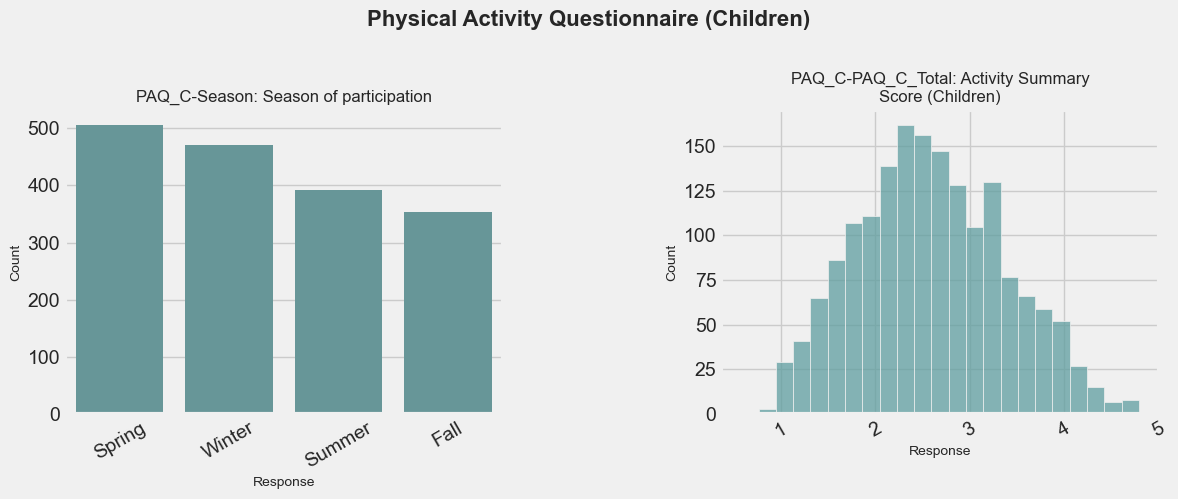

In [102]:
plot_columns(cols, data_dictionary, train_data, suptitle = 'Physical Activity Questionnaire (Children)', num_cols=2)

## Parent-Child Internet Addiction Test
Pay particular attention to this

In [58]:
# These are the related columns and descriptions
display(data_dictionary.loc[data_dictionary['Instrument'] == 'Parent-Child Internet Addiction Test', ['Field', 'Description']])
cols = data_dictionary.loc[data_dictionary['Instrument'] == 'Parent-Child Internet Addiction Test', 'Field']

,Field,Description
54,PCIAT-Season,Season of participation
55,PCIAT-PCIAT_01,How often does your child disobey time limits ...
56,PCIAT-PCIAT_02,How often does your child neglect household ch...
57,PCIAT-PCIAT_03,How often does your child prefer to spend time...
58,PCIAT-PCIAT_04,How often does your child form new relationshi...
59,PCIAT-PCIAT_05,How often do you complain about the amount of ...
60,PCIAT-PCIAT_06,How often do your child's grades suffer becaus...
61,PCIAT-PCIAT_07,How often does your child check his or her e-m...
62,PCIAT-PCIAT_08,How often does your child seem withdrawn from ...
63,PCIAT-PCIAT_09,How often does your child become defensive or ...


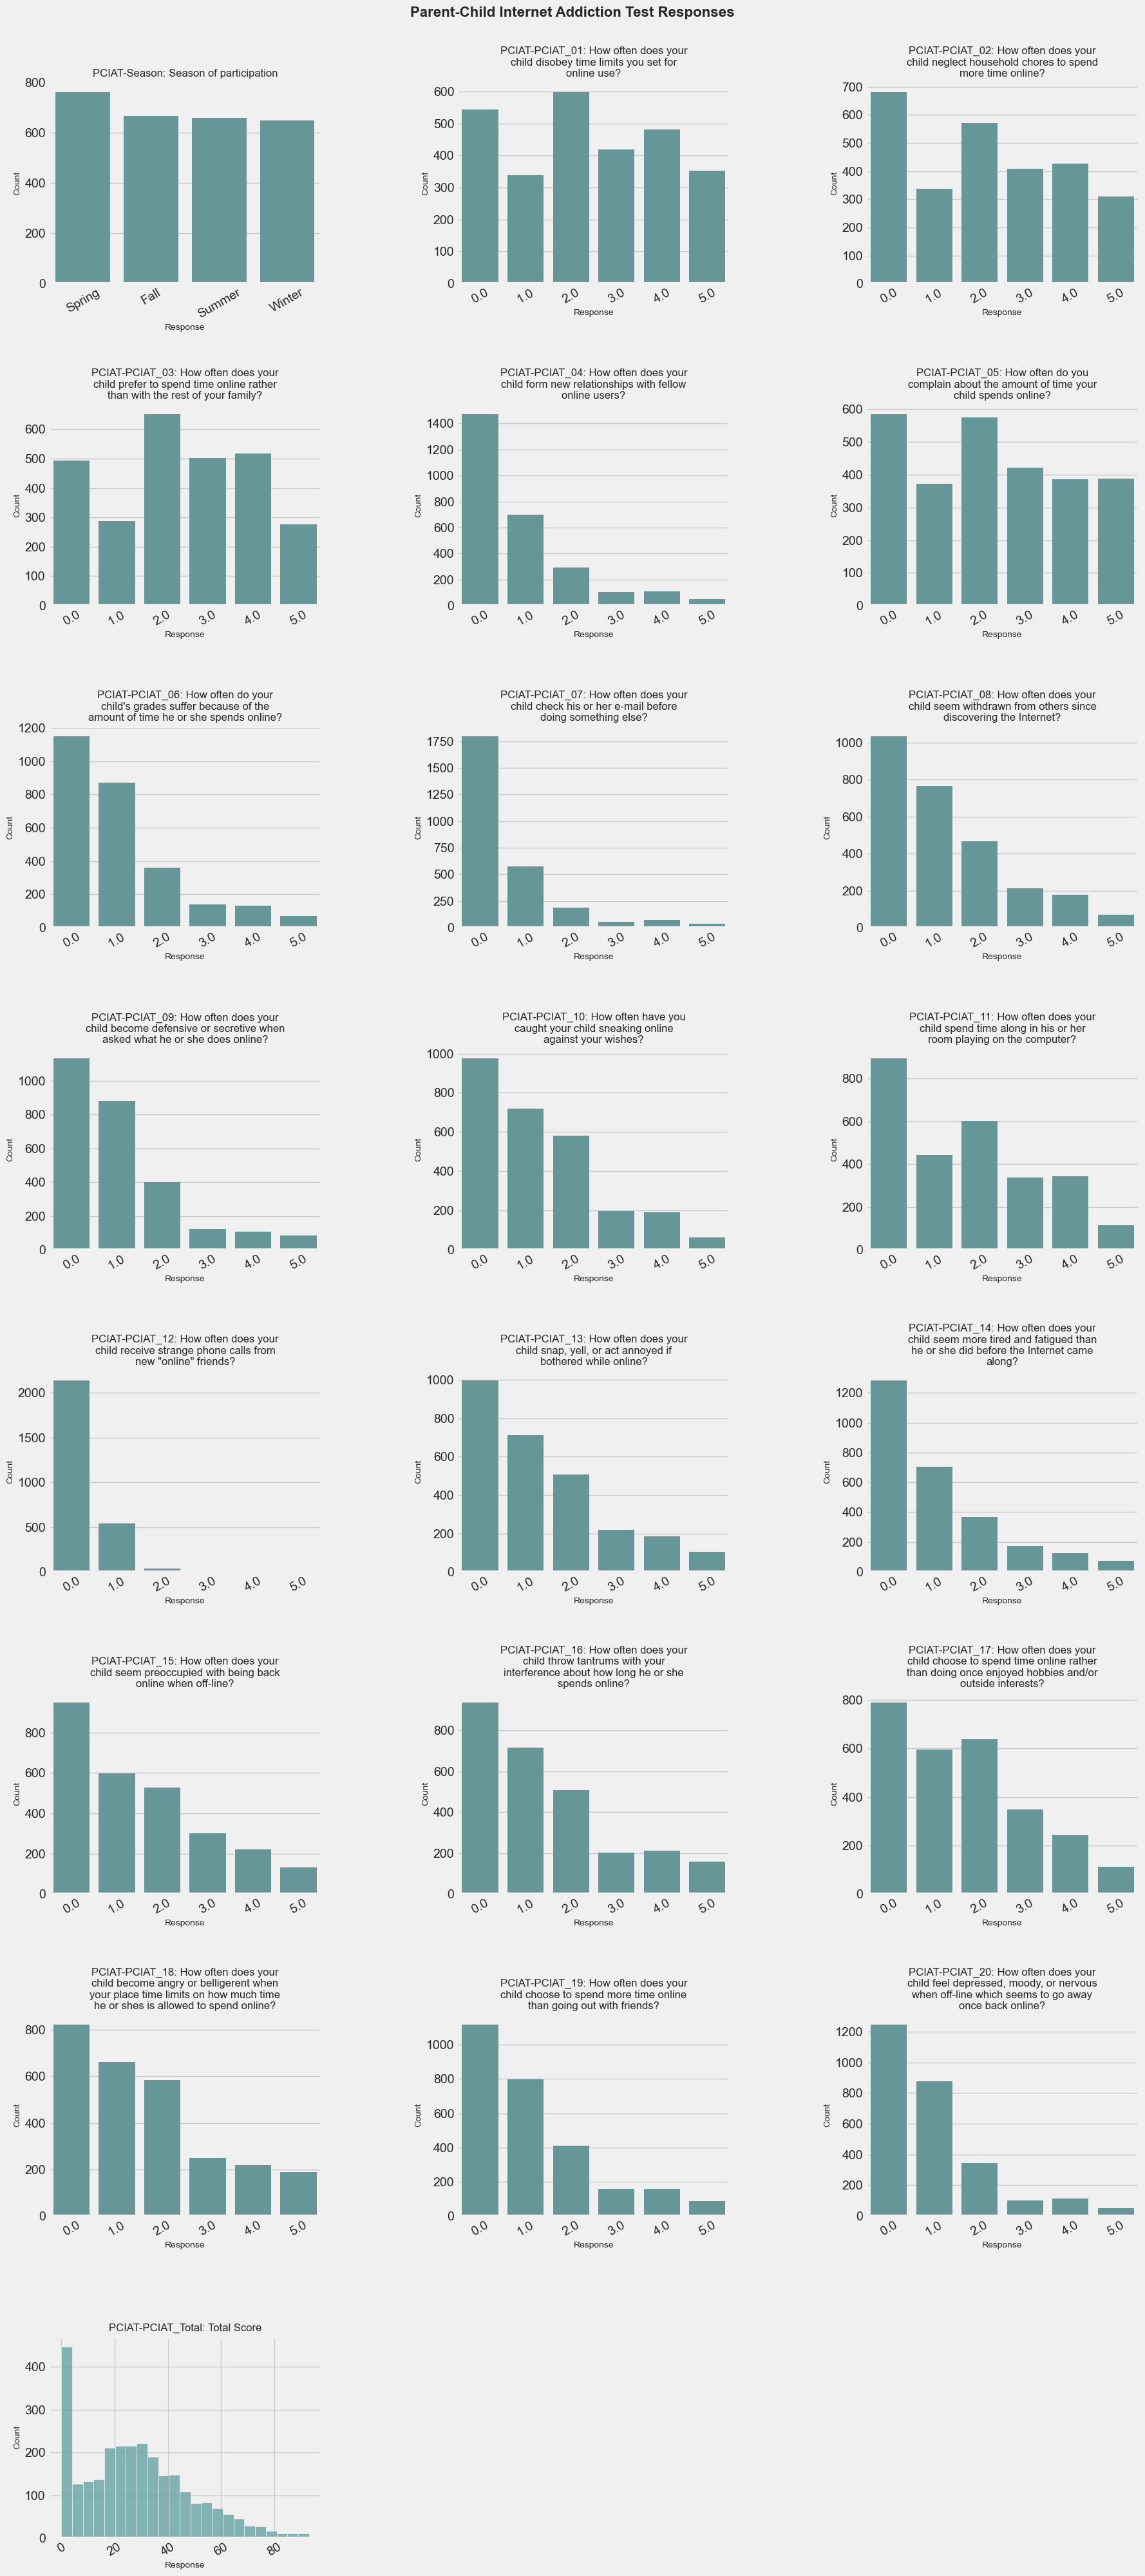

In [59]:
plot_columns(cols, data_dictionary, train_data, suptitle = 'Parent-Child Internet Addiction Test Responses', num_cols=3)

<Axes: xlabel='PCIAT-PCIAT_Total', ylabel='sii'>

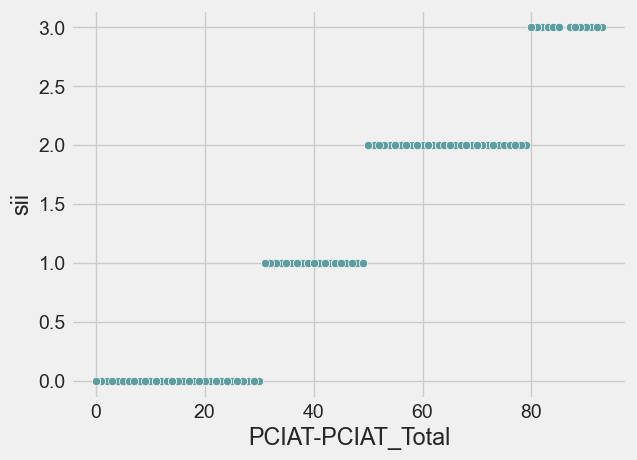

In [38]:
sns.scatterplot(data=train_data, x='PCIAT-PCIAT_Total', y='sii', color='#5F9EA0')
# could change to boxplot

## Sleep Disturbance Scale

In [60]:
# These are the related columns and descriptions
display(data_dictionary.loc[data_dictionary['Instrument'] == 'Sleep Disturbance Scale', ['Field', 'Description']])
cols = data_dictionary.loc[data_dictionary['Instrument'] == 'Sleep Disturbance Scale', 'Field']

,Field,Description
76,SDS-Season,Season of participation
77,SDS-SDS_Total_Raw,Total Raw Score
78,SDS-SDS_Total_T,Total T-Score


- The Total Raw Score is the direct sum of the raw scores from each of the individual items on the SDSC. These items typically assess different sleep problems or disturbances, such as sleep onset difficulties, night awakenings, sleepwalking, or nightmares. Each item is rated on a scale (often a 5-point scale, e.g., 0 = never, 4 = always).
- The Total-T Score is a standardized score derived from the Total Raw Score. It adjusts for factors such as age, and the distribution of responses across a population, which allows for a comparison to a normative sample. The T-score is calculated in such a way that it has a mean of 50 and a standard deviation of 10 within the normative population.

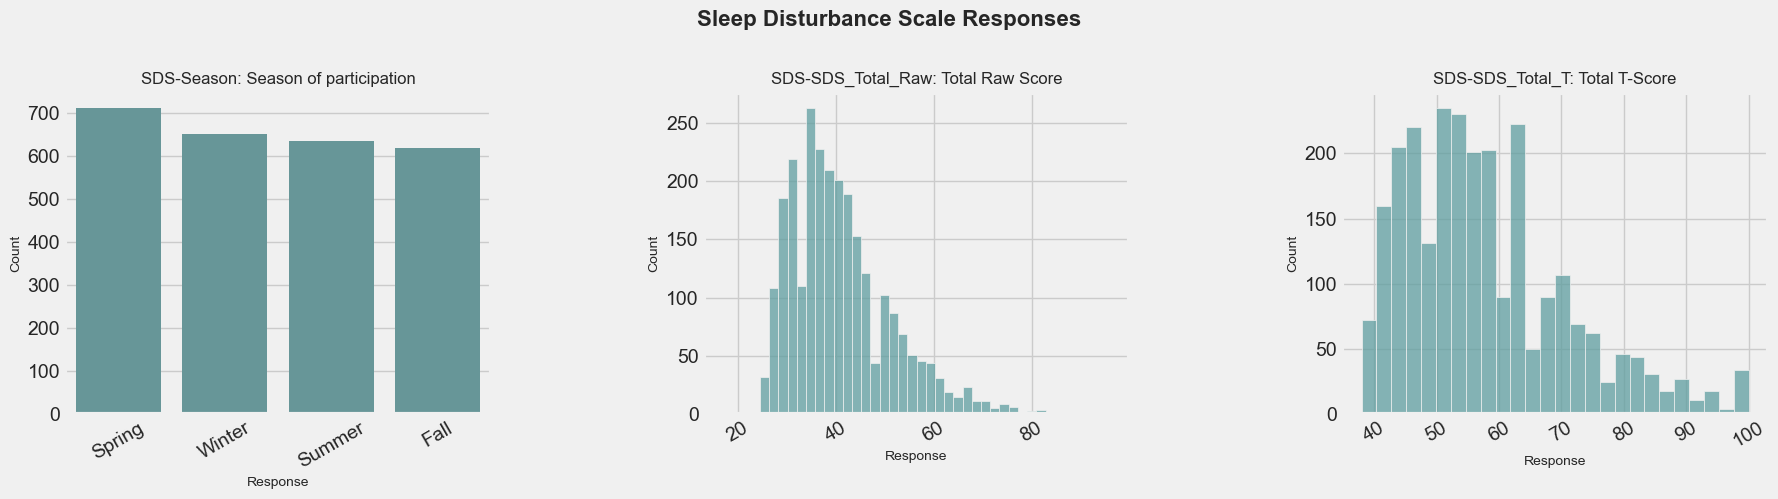

In [62]:
plot_columns(cols, data_dictionary, train_data, suptitle = 'Sleep Disturbance Scale Responses', num_cols=3)

## Internet Use

In [64]:
# These are the related columns and descriptions
display(data_dictionary.loc[data_dictionary['Instrument'] == 'Internet Use', ['Field', 'Description']])
cols = data_dictionary.loc[data_dictionary['Instrument'] == 'Internet Use', 'Field']

,Field,Description
79,PreInt_EduHx-Season,Season of participation
80,PreInt_EduHx-computerinternet_hoursday,Hours of using computer/internet


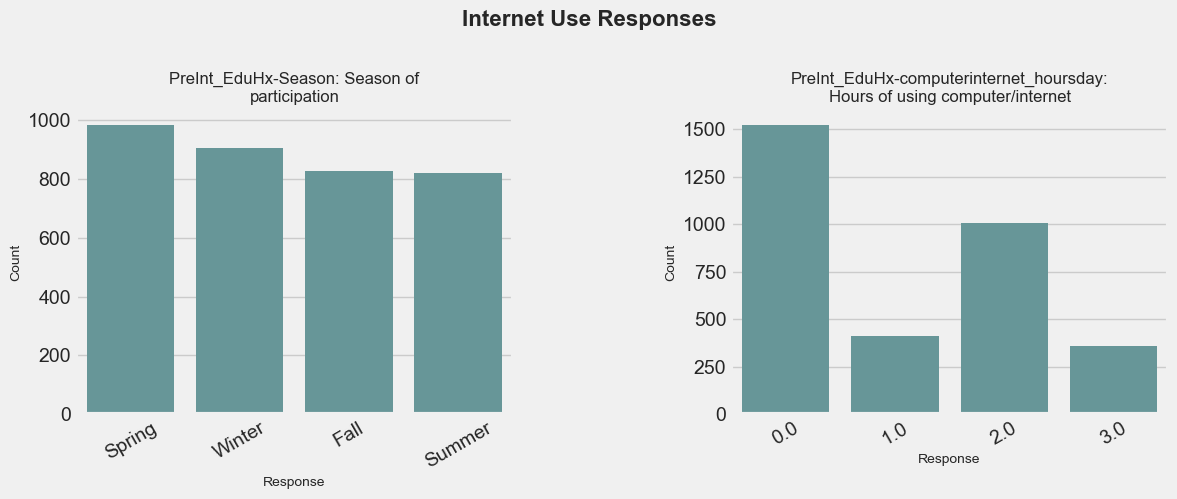

In [65]:
plot_columns(cols, data_dictionary, train_data, suptitle='Internet Use Responses', num_cols=2)

# Bivariate Analysis

/var/folders/18/y5p3lwcd31j2dw1d0_k3lqsh0000gp/T/ipykernel_23046/1146856064.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='sii', y='PreInt_EduHx-computerinternet_hoursday', palette='viridis')


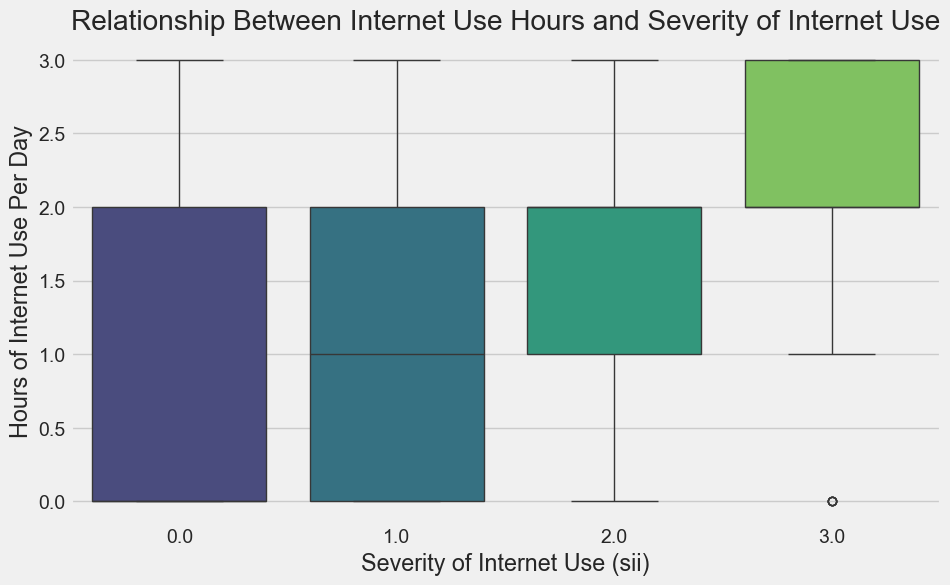

In [104]:
# 5. Bivariate Analysis
# Internet Use Hours vs Target (sii)
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='sii', y='PreInt_EduHx-computerinternet_hoursday', palette='viridis')
plt.xlabel('Severity of Internet Use (sii)')
plt.ylabel('Hours of Internet Use Per Day')
plt.title('Relationship Between Internet Use Hours and Severity of Internet Use')
plt.show()

/var/folders/18/y5p3lwcd31j2dw1d0_k3lqsh0000gp/T/ipykernel_23046/4041062969.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_data, x='sii', y='PreInt_EduHx-computerinternet_hoursday', palette='viridis')


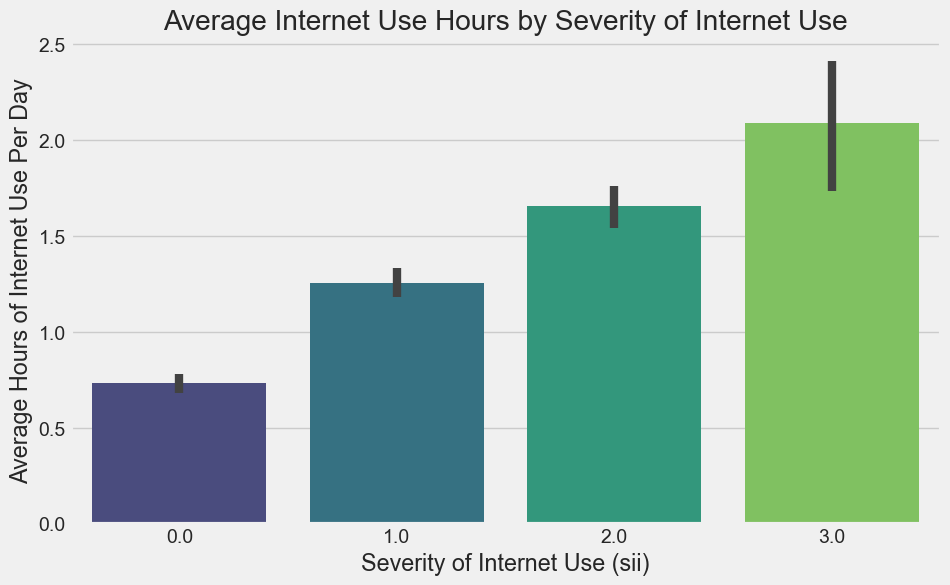

/var/folders/18/y5p3lwcd31j2dw1d0_k3lqsh0000gp/T/ipykernel_23046/4041062969.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='sii', y='PCIAT-PCIAT_Total', palette='viridis')


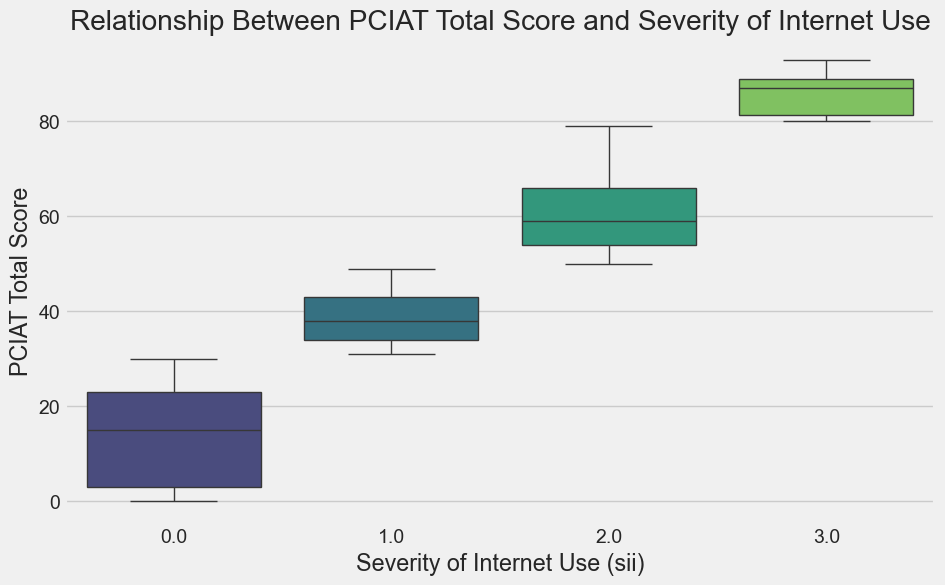

In [105]:
# 6. Exploring Relationships with the Target Variable
# Internet Use Hours vs Target (sii)
plt.figure(figsize=(10, 6))
sns.barplot(data=train_data, x='sii', y='PreInt_EduHx-computerinternet_hoursday', palette='viridis')
plt.xlabel('Severity of Internet Use (sii)')
plt.ylabel('Average Hours of Internet Use Per Day')
plt.title('Average Internet Use Hours by Severity of Internet Use')
plt.show()

# PCIAT Total Score vs Target (sii)
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='sii', y='PCIAT-PCIAT_Total', palette='viridis')
plt.xlabel('Severity of Internet Use (sii)')
plt.ylabel('PCIAT Total Score')
plt.title('Relationship Between PCIAT Total Score and Severity of Internet Use')
plt.show()

/var/folders/18/y5p3lwcd31j2dw1d0_k3lqsh0000gp/T/ipykernel_23046/211552782.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='Basic_Demos-Sex', palette='viridis')


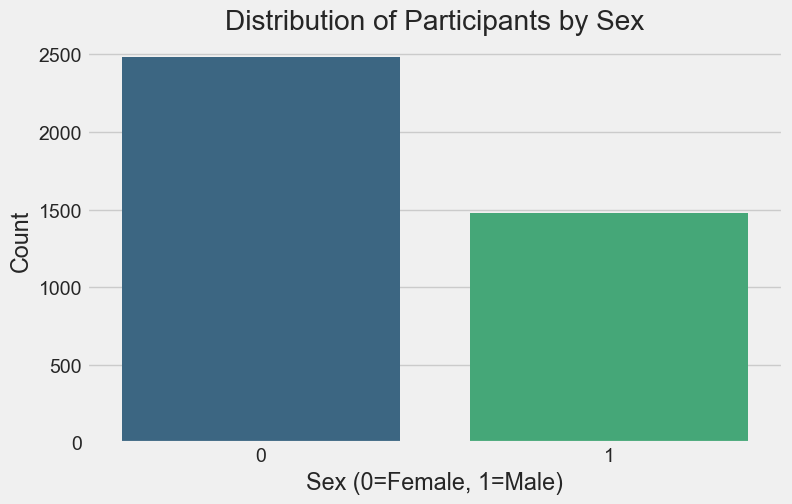

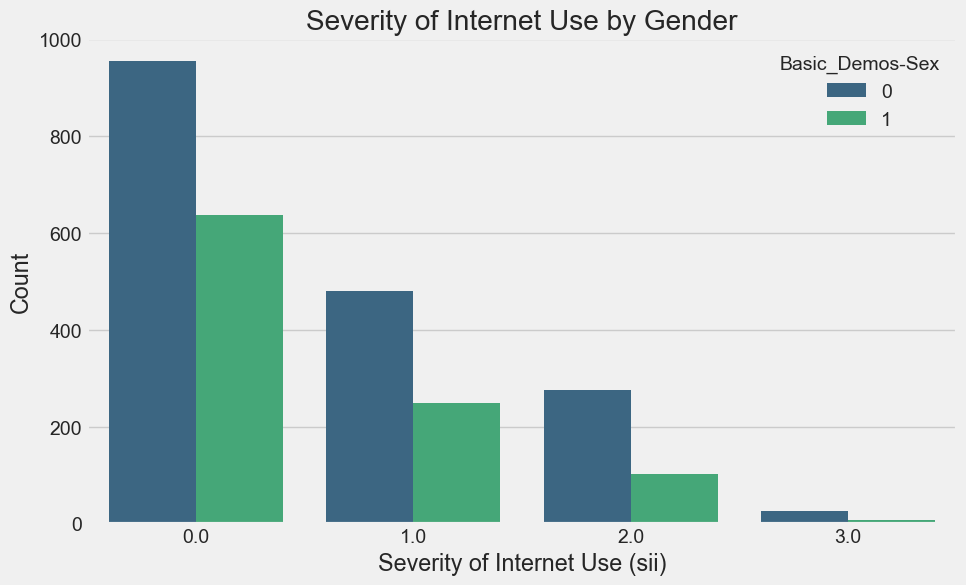

In [106]:
# 7. Categorical Feature Analysis
# Gender distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='Basic_Demos-Sex', palette='viridis')
plt.xlabel('Sex (0=Female, 1=Male)')
plt.ylabel('Count')
plt.title('Distribution of Participants by Sex')
plt.show()

# Gender vs Target (sii)
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='sii', hue='Basic_Demos-Sex', palette='viridis')
plt.xlabel('Severity of Internet Use (sii)')
plt.ylabel('Count')
plt.title('Severity of Internet Use by Gender')
plt.show()